In [1]:
import pandas as pd


raw_df = pd.read_excel (r'/Users/swimmingcircle/cs156_code/assignments/Final_project/long_form_poll_responses_2019.xlsx')

In [2]:
#add time stamp as variable 
raw_df['time_stamp'] = raw_df['Polls ID'].rank(method = 'dense', ascending=True).astype(int)
raw_df.sort_values("time_stamp", inplace = True)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Assessment Score Count')

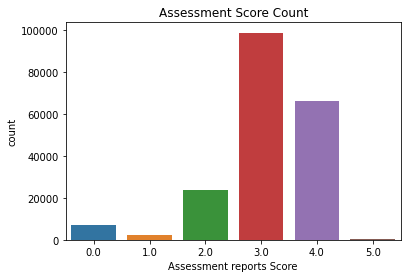

In [4]:
sns.countplot(raw_df['Assessment reports Score'])
plt.title('Assessment Score Count')

In [5]:
raw_df['Assessment reports Score'].mean()

3.0913772213247173

In [6]:
avg_grades = pd.DataFrame(raw_df.groupby('Assessment reports Hashtag')['Assessment reports Score'].agg(['mean', 'count']))
avg_grades = avg_grades.sort_values('mean', ascending= False).reset_index()

In [7]:
avg_grades

,Assessment reports Hashtag,mean,count
0,#histonemodifications,4.000000,2
1,#LPimplementation,4.000000,1
2,#networktheory,4.000000,2
3,#Participation,4.000000,3
4,#Preparedness,4.000000,1
...,...,...,...
798,#buckinghampi,2.307692,39
799,#DA,2.285714,49
800,#Rimplementation,2.178571,28
801,#accountability,1.750000,8


Might need to throw away data that doesn't have enough count. 

### Discard data 

- discard data that has NONE for Assessment reports Hashtag
- discard data that deosn't get graded 


In [8]:
df = raw_df[raw_df['Assessment reports Hashtag'] != 'NONE']
df = raw_df[raw_df['Assessment reports Score'] != 0.0]

In [9]:
df

,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score,time_stamp
0,12522.0,41.0,The strengths of Plato's approach is his const...,#objectivemorality,2.0,1
16,12522.0,335.0,In the breakout we discussed if outside the ca...,#objectivemorality,3.0,1
15,12522.0,333.0,"I think he's good at reasoning, but he has thi...",#deductivearg,2.0,1
14,12522.0,318.0,Back to cmmon confusion time: the section 'und...,#objectivemorality,2.0,1
13,12522.0,315.0,Most difficult weakness is that his position w...,#objectivemorality,2.0,1
...,...,...,...,...,...,...
198045,322265.0,1120.0,Definiteness,#algorithmicstrategies,1.0,15539
198046,322265.0,1121.0,I think important propoerties of algorithms in...,#algorithmicstrategies,3.0,15539
198047,322265.0,1126.0,"This is maybe not an additional property, but ...",#algorithmicstrategies,3.0,15539
198034,322265.0,719.0,comprehensibility. This is related to efficie...,#algorithmicstrategies,3.0,15539


In [10]:
texts = df['Poll Responses Response']

In [11]:
texts

0         The strengths of Plato's approach is his const...
16        In the breakout we discussed if outside the ca...
15        I think he's good at reasoning, but he has thi...
14        Back to cmmon confusion time: the section 'und...
13        Most difficult weakness is that his position w...
                                ...                        
198045                                         Definiteness
198046    I think important propoerties of algorithms in...
198047    This is maybe not an additional property, but ...
198034    comprehensibility.  This is related to efficie...
198079    Adaptability: I'm not sure if it's actually ap...
Name: Poll Responses Response, Length: 191016, dtype: object

In [12]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
import re
import os
import codecs
from sklearn import feature_extraction
from nltk.tokenize import RegexpTokenizer

In [13]:
# load nltk's English stopwords as variable called 'stopwords'
# use nltk.download() to install the corpus first
# Stop Words are words which do not contain important significance to be used in Search Queries
stopwords = nltk.corpus.stopwords.words('english')

# load nltk's SnowballStemmer as variabled 'stemmer'
stemmer = SnowballStemmer("english")

In [14]:
df['Poll Responses Response'] = df['Poll Responses Response'].apply(str)

#remove numbers 
df['Poll Responses Response'] = df['Poll Responses Response'].str.replace(r'\d+','')

/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_88399/2124817980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Poll Responses Response'] = df['Poll Responses Response'].apply(str)
/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_88399/2124817980.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Poll Responses Response'] = df['Poll Responses Response'].str.replace(r'\d+','')
/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_88399/2124817980.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

# Tokenize and Stem 

In [15]:
tokenizer = RegexpTokenizer("[\w']+")
df['tokenized_responses'] = df['Poll Responses Response'].map(tokenizer.tokenize)
df['stemmed_responses'] = df['tokenized_responses'].apply(lambda x: [stemmer.stem(y) for y in x])

/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_88399/646613428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_responses'] = df['Poll Responses Response'].map(tokenizer.tokenize)
/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_88399/646613428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemmed_responses'] = df['tokenized_responses'].apply(lambda x: [stemmer.stem(y) for y in x])


Takes 2 min to tokenize the word. 

In [16]:
df

,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score,time_stamp,tokenized_responses,stemmed_responses
0,12522.0,41.0,The strengths of Plato's approach is his const...,#objectivemorality,2.0,1,"[The, strengths, of, Plato's, approach, is, hi...","[the, strength, of, plato, approach, is, his, ..."
16,12522.0,335.0,In the breakout we discussed if outside the ca...,#objectivemorality,3.0,1,"[In, the, breakout, we, discussed, if, outside...","[in, the, breakout, we, discuss, if, outsid, t..."
15,12522.0,333.0,"I think he's good at reasoning, but he has thi...",#deductivearg,2.0,1,"[I, think, he's, good, at, reasoning, but, he,...","[i, think, he, good, at, reason, but, he, has,..."
14,12522.0,318.0,Back to cmmon confusion time: the section 'und...,#objectivemorality,2.0,1,"[Back, to, cmmon, confusion, time, the, sectio...","[back, to, cmmon, confus, time, the, section, ..."
13,12522.0,315.0,Most difficult weakness is that his position w...,#objectivemorality,2.0,1,"[Most, difficult, weakness, is, that, his, pos...","[most, difficult, weak, is, that, his, posit, ..."
...,...,...,...,...,...,...,...,...
198045,322265.0,1120.0,Definiteness,#algorithmicstrategies,1.0,15539,[Definiteness],[definit]
198046,322265.0,1121.0,I think important propoerties of algorithms in...,#algorithmicstrategies,3.0,15539,"[I, think, important, propoerties, of, algorit...","[i, think, import, propoerti, of, algorithm, i..."
198047,322265.0,1126.0,"This is maybe not an additional property, but ...",#algorithmicstrategies,3.0,15539,"[This, is, maybe, not, an, additional, propert...","[this, is, mayb, not, an, addit, properti, but..."
198034,322265.0,719.0,comprehensibility. This is related to efficie...,#algorithmicstrategies,3.0,15539,"[comprehensibility, This, is, related, to, eff...","[comprehens, this, is, relat, to, effici, in, ..."


In [17]:
df['clean_responses'] = df['stemmed_responses'].apply(lambda x: [item for item in x if item not in stopwords])
df['string'] = df['clean_responses'].apply(" ".join)

/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_88399/2055308800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_responses'] = df['stemmed_responses'].apply(lambda x: [item for item in x if item not in stopwords])
/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_88399/2055308800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['string'] = df['clean_responses'].apply(" ".join)


In [19]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
df.to_csv('processed_response.zip', index=False,
          compression=compression_opts)  

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Assessment Score Count by Cluster')

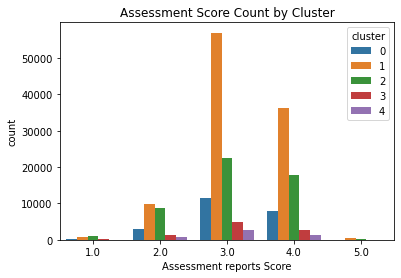

Text(0.5, 1.0, 'Normalized Assessment Score Count by Cluster')

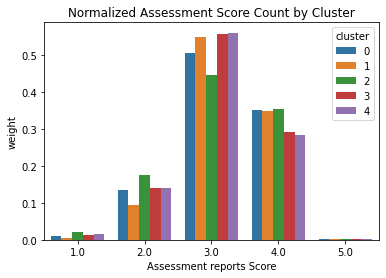

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Assessment Score Count by Cluster')

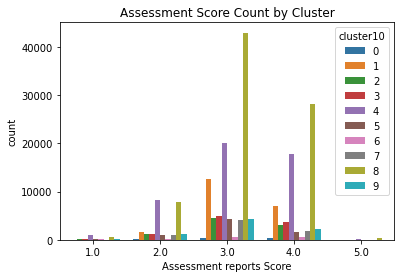

Text(0.5, 1.0, 'Normalized Assessment Score Count by Cluster')

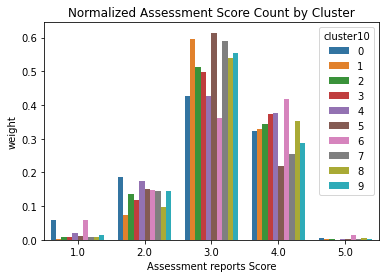

## Multidimensional Scaling 

In [29]:
tfidf_matrix

<191016x81542 sparse matrix of type '<class 'numpy.float64'>'
	with 6311340 stored elements in Compressed Sparse Row format>

In [ ]:
# X = tfidf_matrix.todense()

In [ ]:
from sklearn.decomposition import PCA


labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}

pca_num_components = 2
reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
# print reduced_data

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()



In [ ]:
# from scipy.spatial import distance
# cos_sim = distance.cosine(tfidf_matrix, tfidf_matrix.transpose())

In [ ]:
# from sklearn.metrics.pairwise import linear_kernel

# cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# cosine_sim

#more than 5 min

In [42]:
tfidf_matrix

<1x81542 sparse matrix of type '<class 'numpy.float64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [31]:
cos_sim = distance.cosine([1, 0, 0], [0, 1, 0])
cos_sim

1.0

In [ ]:
dist

In [ ]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()

In [83]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot


NameError: name 'xs' is not defined

In [82]:
prop_df

,cluster,Assessment reports Score,count,weight
0,0,3.0,974,0.386508
1,0,4.0,957,0.379762
2,0,2.0,410,0.162698
3,0,1.0,153,0.060714
4,0,5.0,26,0.010317
5,1,3.0,17487,0.454456
6,1,4.0,14854,0.386029
7,1,2.0,5651,0.146859
8,1,1.0,446,0.011591
9,1,5.0,41,0.001066


In [61]:

# prop_df.groupby(df["cluster"]).sum()
prop_df
# prop_df.groupby(['cluster']).apply(lambda x: x/x['count'].sum())


,Assessment reports Score,count,0,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
cluster,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
prop_df.groupby(prop_df["cluster"]).agg(['sum', 'count', 'mean']) 

Assessment reports Score              count               
                             sum count mean     sum count     mean
cluster                                                           
0                           15.0     5  3.0    2520     5    504.0
1                           15.0     5  3.0   38479     5   7695.8
2                           15.0     5  3.0    8946     5   1789.2
3                           15.0     5  3.0   30827     5   6165.4
4                           15.0     5  3.0  110244     5  22048.8

In [ ]:
CS_class = df[df['Assessment reports Hashtag'] == '#recurrences']
CS_class['clean_responses'] = CS_class['stemmed_responses'].apply(lambda x: [item for item in x if item not in stopwords])
CS_class['string'] = CS_class['clean_responses'].apply(" ".join)
# CS_class['string'] = CS_class['string'].tolist()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

CS_tfidf_vector = TfidfVectorizer()
CS_tfidf_vector



TfidfVectorizer()

In [ ]:
slice = CS_class['string']
CS_tfidf_matrix = CS_tfidf_vector.fit_transform(slice)
CS_tfidf_matrix

<66x247 sparse matrix of type '<class 'numpy.float64'>'
	with 464 stored elements in Compressed Sparse Row format>

In [ ]:
tf_idf = pd.DataFrame(data = tfidf_matrix.toarray(), columns=tfidf_vector.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

66 rows


/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
appear,0.381732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
call,0.381732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
say,0.381732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
upon,0.381732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
split,0.323084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [ ]:
CS_class['cluster'] = np.array(clusters)
CS_class

/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_74786/4184957359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CS_class['cluster'] = np.array(clusters)


,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score,time_stamp,tokenized_responses,stemmed_responses,clean_responses,string,cluster
387,20186.0,309.0,O(n) = logn (I say this because it appears tha...,#recurrences,2.0,31,"[O, n, logn, I, say, this, because, it, appear...","[o, n, logn, i, say, this, becaus, it, appear,...","[n, logn, say, becaus, appear, n, split, half,...",n logn say becaus appear n split half upon rec...,2
388,20186.0,313.0,O(nlog()n),#recurrences,3.0,31,"[O, nlog, n]","[o, nlog, n]","[nlog, n]",nlog n,3
386,20186.0,301.0,"O(n), by the master theorem = a=, b= n^(log_()...",#recurrences,5.0,31,"[O, n, by, the, master, theorem, a, b, n, log_...","[o, n, by, the, master, theorem, a, b, n, log_...","[n, master, theorem, b, n, log_, n, epsilon, i...",n master theorem b n log_ n epsilon inequ satisfi,2
385,20186.0,271.0,O(n),#recurrences,4.0,31,"[O, n]","[o, n]",[n],n,2
383,20186.0,35.0,The answer would be - O(lgn),#recurrences,2.0,31,"[The, answer, would, be, O, lgn]","[the, answer, would, be, o, lgn]","[answer, would, lgn]",answer would lgn,2
...,...,...,...,...,...,...,...,...,...,...,...
9205,50572.0,321.0,The O(N) solution for this problem is just O(N...,#recurrences,2.0,559,"[The, O, N, solution, for, this, problem, is, ...","[the, o, n, solut, for, this, problem, is, jus...","[n, solut, problem, n, becaus, recurr, carri, ...",n solut problem n becaus recurr carri you'r ev...,2
9204,50572.0,269.0,"I'm sorry, I don't know. Really lost and stil...",#recurrences,1.0,559,"[I'm, sorry, I, don't, know, Really, lost, and...","[i'm, sorri, i, don't, know, realli, lost, and...","[i'm, sorri, know, realli, lost, still, tri, c...",i'm sorri know realli lost still tri catch las...,2
9201,50572.0,33.0,"This can be simplified to f(N) = f(N-), which ...",#recurrences,2.0,559,"[This, can, be, simplified, to, f, N, f, N, wh...","[this, can, be, simplifi, to, f, n, f, n, whic...","[simplifi, f, n, f, n, expand, f, n, f, n, f, ...",simplifi f n f n expand f n f n f n f n n f n ...,2
9202,50572.0,46.0,f(n)=f(n-)+f(n-)=f(n)=f(n-)=f(n-)=f(n-)=f(n-)....,#recurrences,4.0,559,"[f, n, f, n, f, n, f, n, f, n, f, n, f, n, f, ...","[f, n, f, n, f, n, f, n, f, n, f, n, f, n, f, ...","[f, n, f, n, f, n, f, n, f, n, f, n, f, n, f, ...",f n f n f n f n f n f n f n f n n f n n n n n,2


In [ ]:

terms = tfidf_vector.get_feature_names()

In [ ]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(5):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Cluster 0:
 exponenti
 check
 choos
 suppos
 induct
 complex
 relat
 recurr
 given
 give
Cluster 1:
 log
 base
 nlogn
 precis
 zero
 forth
 good
 go
 given
 give
Cluster 2:
 level
 solut
 log
 would
 lg
 becaus
 time
 recurs
 theta
 two
Cluster 3:
 nlog
 zero
 form
 half
 good
 go
 given
 give
 get
 geometr
Cluster 4:
 sure
 logn
 think
 time
 domin
 forth
 half
 good
 go
 given


In [ ]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % terms[ind],end=',')
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: exponenti, check, choos, suppos, induct, complex,

Cluster 1 words: log, base, nlogn, precis, zero, forth,

Cluster 2 words: level, solut, log, would, lg, becaus,

Cluster 3 words: nlog, zero, form, half, good, go,

Cluster 4 words: sure, logn, think, time, domin, forth,





In [ ]:
from scipy.spatial import distance
cos_sim = distance.cosine(CS_tfidf_matrix, CS_tfidf_matrix.transpose())

In [191]:
# tokenizer = RegexpTokenizer("[\w']+")
# CS_class['Poll Responses Response'] = CS_class['Poll Responses Response'].map(tokenizer.tokenize)
# CS_class['Stemmed Poll Responses Response'] = CS_class['Poll Responses Response'].apply(lambda x: [stemmer.stem(y) for y in x])

Explanation of methods: Note that when calling RegexpTokenizer, you're simply creating an instance of the class with a set of parameters (calling its __init__ method). In order to actually tokenize the dataframe column with the specified pattern you must call its RegexpTokenizer.tokenize method:

RegexpTokenizer only takes sentence, but we can use it as a class. 

Stemmer needs to run through every word in the sentence list, so need to apply `apply`.


# Better data cleaning idea 